# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [5]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,1.275000e+03,1542.000000,1632.000000,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,1.329473e+06,30016.603510,80671.033008,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,1.815070e+05,2199.750000,19029.750000,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,9.661480e+05,22691.750000,78864.250000,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [7]:
df['WINSORIZE_TOTAL_EXPENDITURE'] = winsorize(df['TOTAL_EXPENDITURE'], (0.05, 0.05))
df['WINSORIZE_TOTAL_REVENUE'] = winsorize(df['TOTAL_REVENUE'], (0.05, 0.05))
df['WINSORIZE_FEDERAL_REVENUE'] = winsorize(df['FEDERAL_REVENUE'], (0.05, 0.05))

df.to_csv('df_winsorize.csv', encoding='utf8', index = False)

In [8]:
df_winsorize = pd.read_csv('df_winsorize.csv')
df_winsorize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


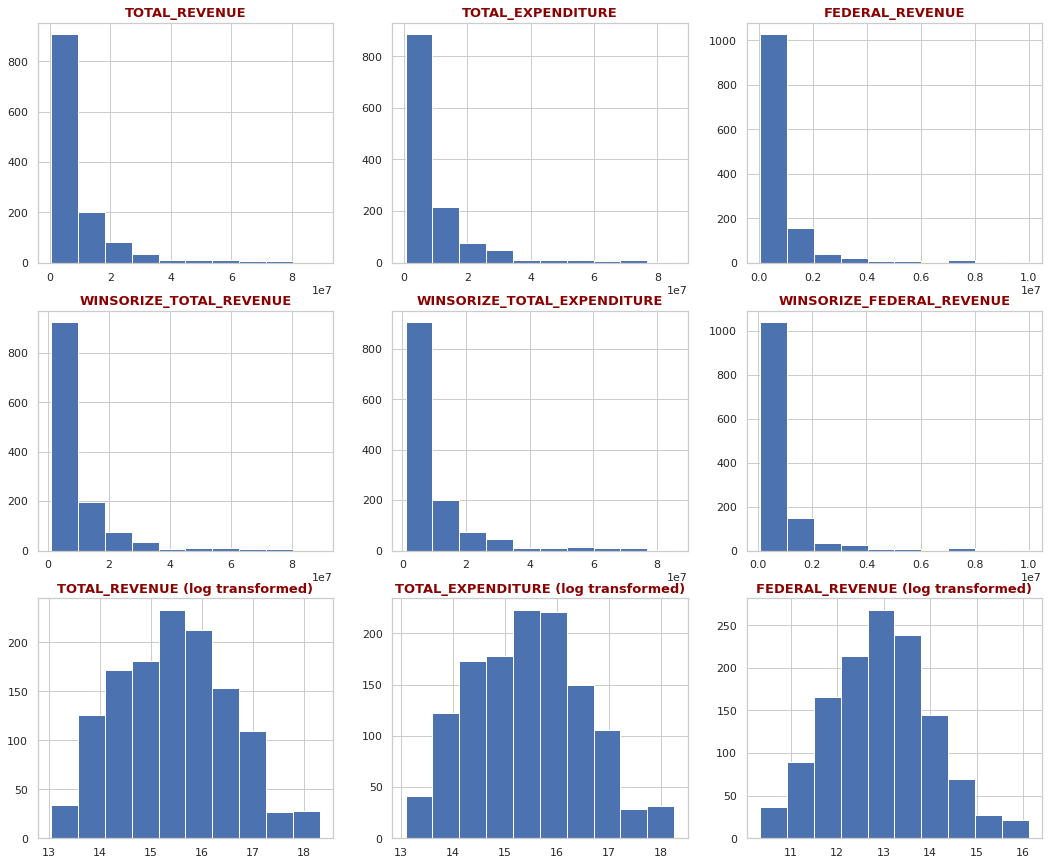

In [9]:
plt.figure(figsize=(18,15))

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE' , 'FEDERAL_REVENUE']
winsorize_variables= ['WINSORIZE_TOTAL_REVENUE', 'WINSORIZE_TOTAL_EXPENDITURE', 'WINSORIZE_FEDERAL_REVENUE']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df[variables[i]]))
    plt.title(variables[i] + ' (log transformed)', fontdict=title_font)

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

In [15]:
# Firstly, I sorted the years cuz they were unordered. Only then I checked the California State
df2 = df
df2.YEAR.sort_values(ascending=False)
df2 = df2[df2['STATE'] == 'CALIFORNIA']
df2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WINSORIZE_TOTAL_EXPENDITURE,WINSORIZE_TOTAL_REVENUE,WINSORIZE_FEDERAL_REVENUE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,27138832.0,26260025.0,2072470.0
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN,28110986.0,28043338.0,2151157.0
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,6754346.0,1615630.0,1916061.0,66450.0,448237.0,426919.0,388561.0,285132.0,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN,23012688.0,23440845.0,2095878.0
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,8603751.0,2181053.0,2669270.0,69182.0,472334.0,428553.0,399039.0,287428.0,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN,30097549.0,29512214.0,2612241.0
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,NaN,NaN,5686198.0,NaN,NaN,NaN,NaN,31561692.0,31282981.0,2603882.0
259,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,10040400.0,1792979.0,3088674.0,76584.0,463684.0,451069.0,412604.0,317595.0,3591033.0,1578929.0,5803887.0,NaN,NaN,NaN,NaN,33862281.0,35614934.0,2850766.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,10939061.0,1862674.0,4335730.0,81926.0,459262.0,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,38087666.0,39183018.0,3149260.0
361,1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,11539910.0,1954362.0,4738866.0,85992.0,459771.0,489356.0,431730.0,347914.0,3734997.0,1675778.0,6038590.0,NaN,NaN,NaN,NaN,40834643.0,41393435.0,3599923.0
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,12429070.0,2269603.0,5849441.0,89919.0,459771.0,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN,45829753.0,46628207.0,4024940.0
463,2001_CALIFORNIA,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,14127664.0,2570224.0,6755895.0,100351.0,457165.0,485301.0,461133.0,365907.0,3871843.0,1745295.0,6247726.0,NaN,NaN,NaN,NaN,52082540.0,53288943.0,4280358.0


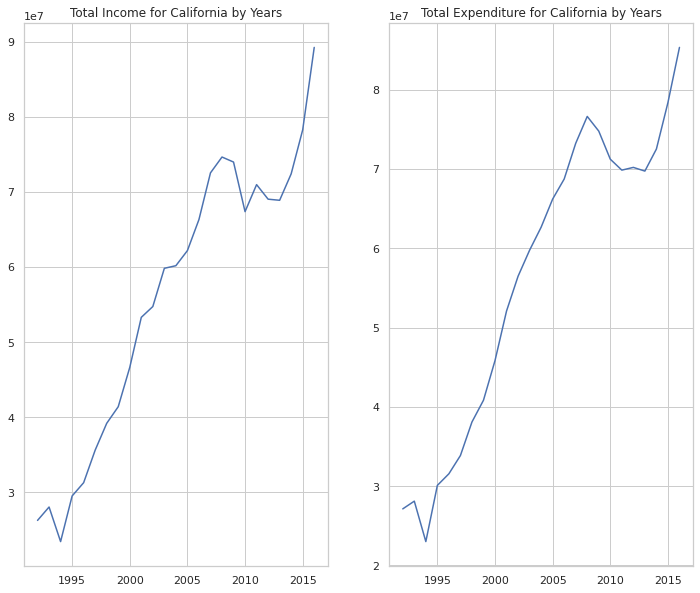

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.title('Total Income for California by Years')
plt.plot(df2['YEAR'], df2['TOTAL_REVENUE'])

plt.subplot(122)
plt.title('Total Expenditure for California by Years')
plt.plot(df2['YEAR'], df2['TOTAL_EXPENDITURE'])

plt.show()

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [17]:
df2_math = df2['AVG_MATH_8_SCORE']
df2_reading = df2['AVG_READING_8_SCORE']
df2_math.dropna()

4       261.0
412     260.0
565     267.0
667     269.0
769     270.0
871     270.0
973     273.0
1075    276.0
1177    275.0
1307    256.0
1309    277.0
1666    276.0
Name: AVG_MATH_8_SCORE, dtype: float64

In [18]:
df2_reading.dropna()

310     252.0
514     250.0
565     251.0
667     250.0
769     251.0
871     253.0
973     255.0
1075    262.0
1177    259.0
1309    263.0
1666    259.0
Name: AVG_READING_8_SCORE, dtype: float64

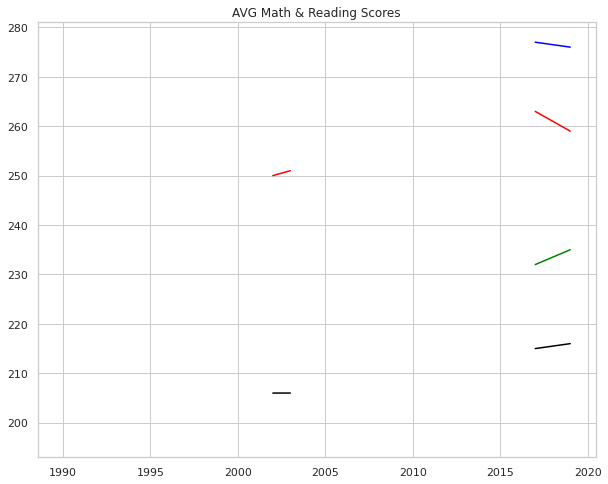

In [19]:
plt.figure(figsize=(10,8))

plt.title('AVG Math & Reading Scores')
plt.plot(df2['YEAR'], df2_math, color = 'blue')
plt.plot(df2['YEAR'], df2_reading, color = 'red')
plt.plot(df2['YEAR'], df2['AVG_MATH_4_SCORE'], color = 'green')
plt.plot(df2['YEAR'], df2['AVG_READING_4_SCORE'], color = 'black')

plt.show()

# There are less information than what we've expected but one can see that both primary and high school students are better in Mathematics than reading.

**(4)** What is the distribution of mathematics and reading grades?

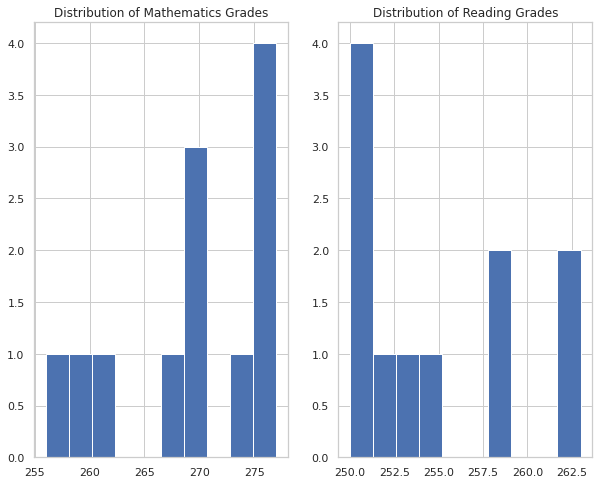

In [20]:
plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df2['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df2['AVG_READING_8_SCORE'].dropna())

plt.show()

**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [21]:
df2['AVG_MATH_8_SCORE'].fillna(df2['AVG_MATH_8_SCORE'].mean(), inplace=True)
df2['AVG_READING_8_SCORE'].fillna(df2['AVG_READING_8_SCORE'].mean(), inplace=True)


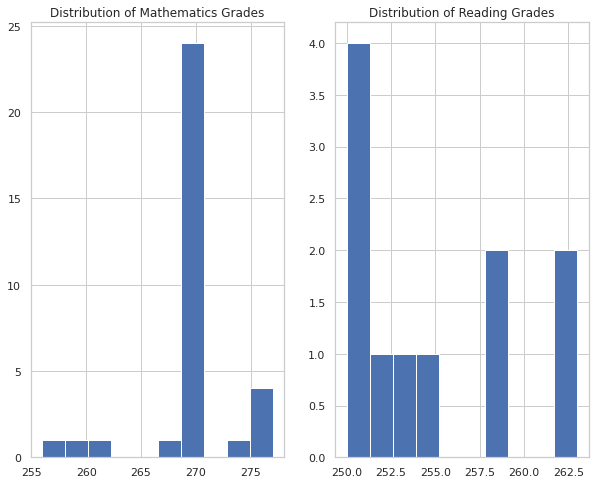

In [22]:
plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df2['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df2['AVG_READING_8_SCORE'].dropna())

plt.show()

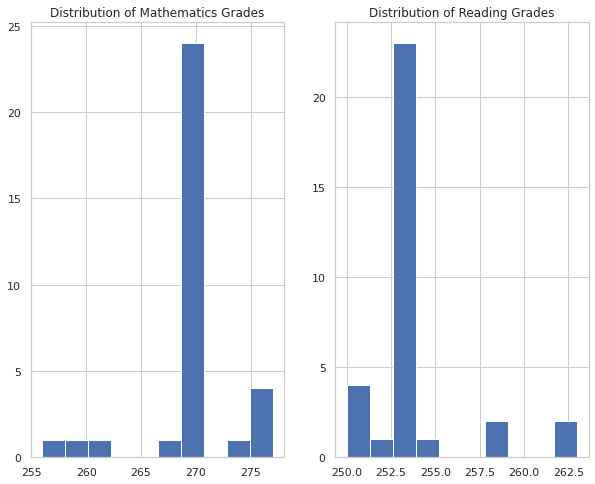

In [27]:
df3 = df
df3.YEAR.sort_values(ascending=False)
df3 = df3[df3['STATE'] == 'CALIFORNIA']

df3['AVG_MATH_8_SCORE'].fillna(df3['AVG_MATH_8_SCORE'].median() , inplace=True)
df3['AVG_READING_8_SCORE'].fillna(df3['AVG_READING_8_SCORE'].median(), inplace=True)

plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df3['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df3['AVG_READING_8_SCORE'].dropna())

plt.show()

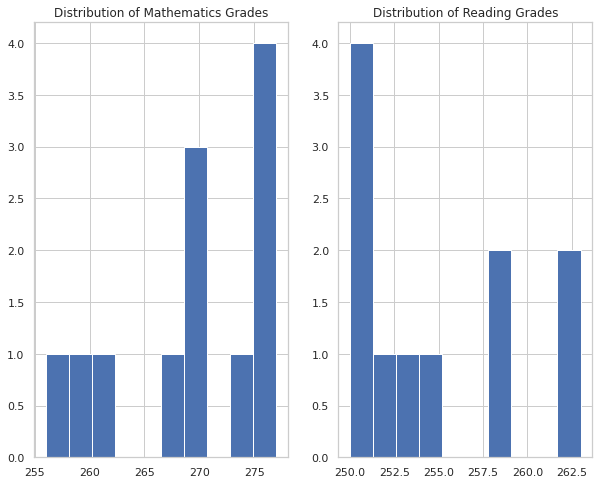

In [28]:
df4 = df
df4.YEAR.sort_values(ascending=False)
df4 = df4[df4['STATE'] == 'CALIFORNIA']

df4.AVG_MATH_8_SCORE.interpolate(method ='linear', limit_direction ='forward')
df4.AVG_READING_8_SCORE.interpolate(method ='linear', limit_direction ='forward')

plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df4['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df4['AVG_READING_8_SCORE'].dropna())

plt.show()